In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# for relative imports
import sys
sys.path.insert(0, '..')
from src.data.text_2_dataframe import Text2DF

# Initialisation
## data paths

In [2]:
# tweets dataset path
raw_data_file_path= os.path.abspath('../data/raw/twitter_sample_dataset.csv')

## Data read

In [3]:
raw_data= pd.read_csv(raw_data_file_path)
raw_data.head()

,Sentiment,tweet
0,0,@Nkluvr4eva My poor little dumpling In Holmde...
1,0,I'm off too bed. I gotta wake up hella early t...
2,0,I havent been able to listen to it yet My spe...
3,0,now remembers why solving a relatively big equ...
4,0,"Ate too much, feel sick"


# EDA of Raw Data
## dataset shape

In [4]:
raw_data.shape

(48000, 2)

the dataset have:
- **48000** rows or tweets
- **2** columns which are :
  - ***Sentiment***: expressing the overall sentiment (*negative* or *positive*) 
  - ***tweet***: the tweet content 

## missing values

In [5]:
raw_data.isna().sum()

Sentiment    0
tweet        0
dtype: int64

There is no missing values for the two columns\
the columns may be split into :
- ***Target*** --> y --> Sentiment
- ***Feature*** --> X --> tweet 

In [6]:
y= raw_data['Sentiment']
X= raw_data['tweet']

## Target exploration

In [7]:
# percentage of each class
y.value_counts(normalize=True)

1    0.500146
0    0.499854
Name: Sentiment, dtype: float64

the target has **2** values so it's ***Binary***
- ***0***: codes for **Negative**
- ***1***: codes for **Positive**

each one of those two values has approximately **50%** of the dataset which that the dataset is ***Balanced***\
as shown in this figure below

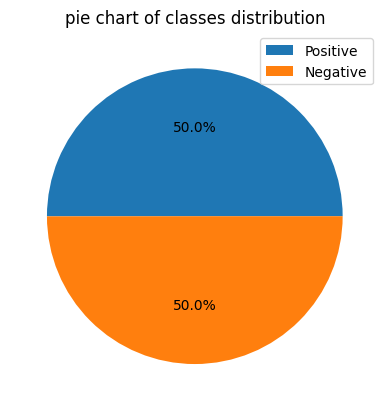

In [8]:
plt.pie(y.value_counts(),autopct= lambda x: f'{x:.1f}%')
plt.legend(['Positive', 'Negative'])
plt.title('pie chart of classes distribution')
plt.show()

## tweets exploration

In [9]:
X.describe()

count             48000
unique            47900
top       Good morning 
freq                 10
Name: tweet, dtype: object

we notice that there are ***47900*** unique tweets over ***48000*** --> there are duplicates\
the most repeated tweet is good morning with a frequency of ***10***
- we will drop duplicates

In [10]:
X = X.drop_duplicates()

### tweets length
inorder to verify how many words each tweet has

In [11]:
tweets_length= X.apply(lambda x: len(x.split()))

In [12]:
tweets_length.describe()

count    47900.000000
mean        13.205950
std          6.947981
min          1.000000
25%          7.000000
50%         12.000000
75%         19.000000
max         41.000000
Name: tweet, dtype: float64

In [13]:
print(f'max length of a tweet is: {tweets_length.max()} words')
print(f'min length of a tweet is: {tweets_length.min()} words')
print(f'mean length of a tweet is: {tweets_length.mean():.2f} words')
print(f'median length of a tweet is: {tweets_length.median()} words')
print(f'mode length of a tweet is: {tweets_length.mode()[0]} words')

max length of a tweet is: 41 words
min length of a tweet is: 1 words
mean length of a tweet is: 13.21 words
median length of a tweet is: 12.0 words
mode length of a tweet is: 8 words


In [14]:
l= int(tweets_length.mean() - tweets_length.std())
r= int(tweets_length.mean() + tweets_length.std())
print(f"{tweets_length.between(left=l , right= r, inclusive='both').mean() * 100:.2f}% of the tweets has a length between {l} and {r}")

66.92% of the tweets has a length between 6 and 20


the ***mean*** length of the tweets in the dataset is ***13*** words\
the ***longest*** one has ***41*** words and the ***shortest*** has ***1*** word\
approximately ***67%*** of the tweets have a length between ***6*** and ***20*** words\
often the tweets are ***8*** words length

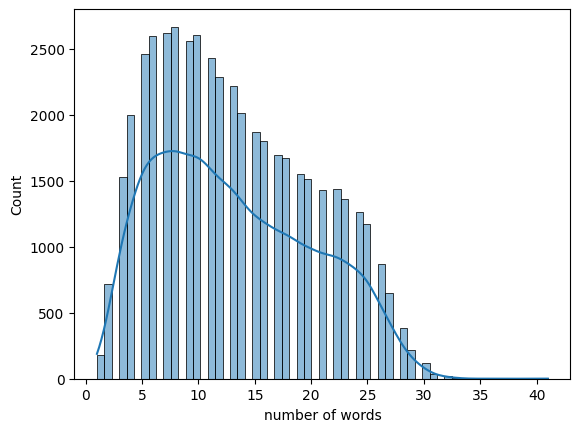

In [15]:
sns.histplot(tweets_length, kde= True)
plt.xlabel('number of words')
plt.show()

### tweets content
#### user mentions

In [16]:
# counting the number of @ will give us the number of user mentions in a tweet
user_mentions= X.apply(lambda x: x.count('@'))

In [17]:
user_mentions.describe()

count    47900.000000
mean         0.503152
std          0.600954
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         10.000000
Name: tweet, dtype: float64

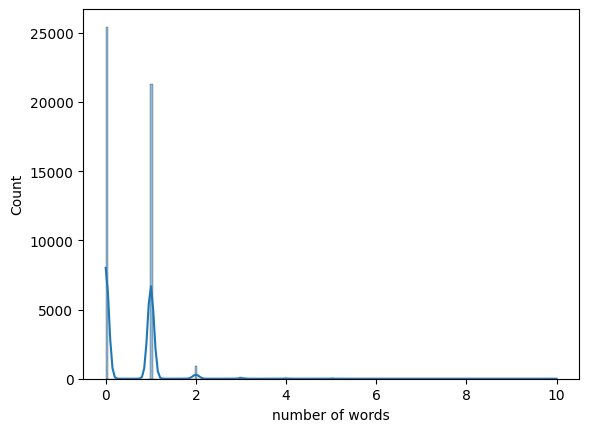

In [18]:
sns.histplot(user_mentions, kde= True)
plt.xlabel('number of words')
plt.show()

In [19]:
print(f'max mentions in a tweet is: {user_mentions.max()} mentions')
print(f'min mentions in a tweet is: {user_mentions.min()} mentions')
print(f'mean mentions in a tweet is: {user_mentions.mean():.2f} mentions')
print(f'median mentions in a tweet is: {user_mentions.median()} mentions')
print(f'mode mentions in a tweet is: {user_mentions.mode()[0]} mentions')

max mentions in a tweet is: 10 mentions
min mentions in a tweet is: 0 mentions
mean mentions in a tweet is: 0.50 mentions
median mentions in a tweet is: 0.0 mentions
mode mentions in a tweet is: 0 mentions


In [20]:
lm= int(user_mentions.mean() - user_mentions.std())
rm= int(user_mentions.mean() + user_mentions.std())
print(f"{user_mentions.between(left=lm , right= rm, inclusive='both').mean() * 100:.2f}% of the tweets have between {lm} and {rm} mentions")

97.56% of the tweets have between 0 and 1 mentions


In [21]:
print(f'{user_mentions.sum()/tweets_length.sum()* 100: .2f}% of tweets\' content is user mentions')

 3.81% of tweets' content is user mentions


#### # mentions

In [22]:
# counting the # occurences 
hashtag_mentions= X.apply(lambda x: x.count('#'))

In [23]:
hashtag_mentions.describe()

count    47900.000000
mean         0.027182
std          0.195067
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: tweet, dtype: float64

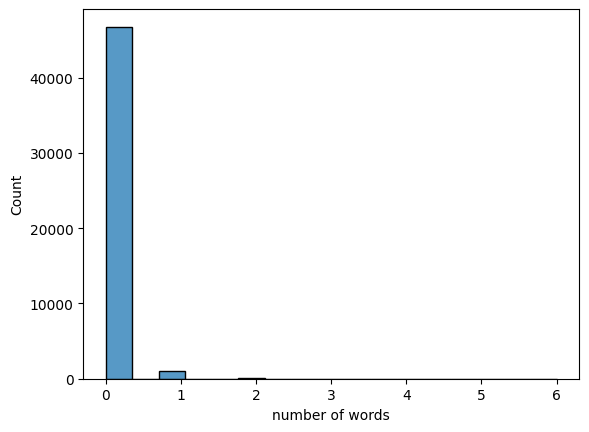

In [24]:
sns.histplot(hashtag_mentions)
plt.xlabel('number of words')
plt.show()

In [25]:
print(f'max # mentions in a tweet is: {hashtag_mentions.max()} mentions')
print(f'min # mentions in a tweet is: {hashtag_mentions.min()} mentions')
print(f'mean # mentions in a tweet is: {hashtag_mentions.mean():.2f} mentions')
print(f'median # mentions in a tweet is: {hashtag_mentions.median()} mentions')
print(f'mode # mentions in a tweet is: {hashtag_mentions.mode()[0]} mentions')

max # mentions in a tweet is: 6 mentions
min # mentions in a tweet is: 0 mentions
mean # mentions in a tweet is: 0.03 mentions
median # mentions in a tweet is: 0.0 mentions
mode # mentions in a tweet is: 0 mentions


In [26]:
print(f'{hashtag_mentions.sum()/tweets_length.sum()* 100: .2f}% of tweets\' content is # mentions')

 0.21% of tweets' content is # mentions


# Feature Engineering
## initialisation
we instanciate a ***Text2DF*** object inorder to do tweets cleaning, filtering and dataframing\
since we're doing sentiment analysis so we have some list of words that we want to keep

In [27]:
words_to_keep= ['good', 'better', 'best', 'not', 'worst', 'worse', 'bad']
t2df= Text2DF(keep_words= words_to_keep)

## tweet cleaning
tweets can have @users, #tags, numbers and other symbols which are notusefu for our task so we have to delete those from our tweets

In [28]:
# clean tweets
cleaned_tweets= t2df.clean_texts(X)

In [29]:
cleaned_tweets.describe()

count     47900
unique    47100
top            
freq        112
Name: tweet, dtype: object

- this means there are **800** duplicate tweets
- the most frequent one is the *empty* tweet

In [30]:
cleaned_tweets= cleaned_tweets.drop_duplicates()

### verification
let's verify about @mentions and #mentions

In [31]:
print(f"The number of @ mentions in the cleaned tweets is: {cleaned_tweets.apply(lambda x: x.count('@')).sum()}")
print(f"The number of # mentions in the cleaned tweets is: {cleaned_tweets.apply(lambda x: x.count('#')).sum()}")
print(f'the number of empty tweets is: {(cleaned_tweets== "").sum()}')

The number of @ mentions in the cleaned tweets is: 0
The number of # mentions in the cleaned tweets is: 0
the number of empty tweets is: 1


### tweets length

In [32]:
# conting the words of each tweet
cleaned_tweets_length= cleaned_tweets.apply(lambda x: len(x.split()))

In [33]:
cleaned_tweets_length.describe()

count    47100.000000
mean        13.120446
std          7.062009
min          0.000000
25%          7.000000
50%         12.000000
75%         19.000000
max         40.000000
Name: tweet, dtype: float64

In [34]:
print(f'max length of a cleaned tweet is: {cleaned_tweets_length.max()} words')
print(f'min length of a cleaned tweet is: {cleaned_tweets_length.min()} words')
print(f'mean length of a cleaned tweet is: {cleaned_tweets_length.mean():.2f} words')
print(f'median length of a cleaned tweet is: {cleaned_tweets_length.median()} words')
print(f'mode length of a cleaned tweet is: {cleaned_tweets_length.mode()[0]} words')

max length of a cleaned tweet is: 40 words
min length of a cleaned tweet is: 0 words
mean length of a cleaned tweet is: 13.12 words
median length of a cleaned tweet is: 12.0 words
mode length of a cleaned tweet is: 8 words


In [35]:
lc= int(cleaned_tweets_length.mean() - cleaned_tweets_length.std())
rc= int(cleaned_tweets_length.mean() + cleaned_tweets_length.std())
print(f"{cleaned_tweets_length.between(left=lc , right= rc, inclusive='both').mean() * 100:.2f}% of the tweets has a length between {lc} and {rc}")

65.80% of the tweets has a length between 6 and 20


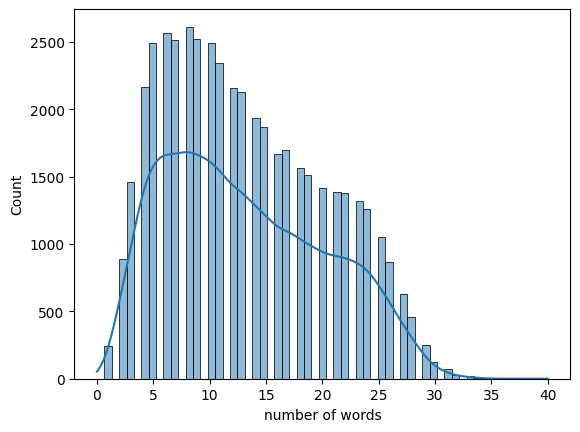

In [36]:
sns.histplot(cleaned_tweets_length, kde= True)
plt.xlabel('number of words')
plt.show()

the ***mean*** length of the tweets in the dataset is ***13*** words\
the ***longest*** one has ***40*** words\
the ***shortest*** has ***0*** words
- as expected there are some empty tweets 1 exactly since we dropped duplicates

approximately ***66%*** of the tweets have a length between ***6*** and ***20*** words\
often the tweets are ***8*** words length\
The overall distribution didn't change 

### empty tweets
let's see the target corresponding to empty tweets

#### Indicies

In [37]:
# getting empty tweets indicies
empty_tweets_index= cleaned_tweets[cleaned_tweets == ''].index
empty_tweets_index

Int64Index([62], dtype='int64')

### new dataset

In [38]:
cleaned_X= cleaned_tweets.drop(empty_tweets_index)

In [39]:
cleaned_y= y[cleaned_X.index].copy()# to align y values with the remaining tweets
cleaned_y.value_counts(normalize=True)

0    0.502176
1    0.497824
Name: Sentiment, dtype: float64

The overall disparity of the target is unchanged

In [40]:
cleaned_dataset= pd.concat([cleaned_y, cleaned_X], axis=1)# concatenating the Series to make new dataframe

In [41]:
cleaned_dataset.head()

,Sentiment,tweet
0,0,my poor little dumpling in holmdel vids he was...
1,0,i m off too bed i gotta wake up hella early to...
2,0,i havent been able to listen to it yet my spea...
3,0,now remembers why solving a relatively big equ...
4,0,ate too much feel sick


In [42]:
cleaned_dataset.to_csv('../data/interim/cleaned_dataset.csv', index=False)

**NOTE**: From now on we will use the cleaned dataset

## Filtering
Text2DF provides us methods allowing us filtering the text data, where we exclude all the words that are not in the the 10000 wordlist, and paying attention to keep the words in the keep_words given argument at instantiation

In [43]:
# filtering the tweets
# get_wordlist --> the default wordlist of 10000 most common words
# get_stopwords --> 700+ english stop words
# get_filtered_wordlist --> a list of words without stopwords
filtered_tweets= t2df.filter_texts(cleaned_X, wordlist= t2df.get_filtered_wordlist())

In [44]:
cleaned_X.shape

(47099,)

In [45]:
filtered_tweets.describe()

count     47099
unique    42977
top            
freq       1088
Name: tweet, dtype: object

- there are 42977 unique tweets over 47099, after filtering
- 4122 repeated tweets
- the empty tweet is the most frequent one

In [46]:
filtered_tweets= filtered_tweets.drop_duplicates()

### filtered tweets length

In [47]:
filtered_tweets_length= filtered_tweets.apply(lambda x: len(x.split()))
filtered_tweets_length.describe()

count    42977.000000
mean         5.612863
std          2.930318
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         19.000000
Name: tweet, dtype: float64

In [48]:
print(f'max length of a filtered tweet is: {filtered_tweets_length.max()} words')
print(f'min length of a filtered tweet is: {filtered_tweets_length.min()} words')
print(f'mean length of a filtered tweet is: {filtered_tweets_length.mean():.2f} words')
print(f'median length of a filtered tweet is: {filtered_tweets_length.median()} words')
print(f'mode length of a filtered tweet is: {filtered_tweets_length.mode()[0]} words')

max length of a filtered tweet is: 19 words
min length of a filtered tweet is: 0 words
mean length of a filtered tweet is: 5.61 words
median length of a filtered tweet is: 5.0 words
mode length of a filtered tweet is: 3 words


In [49]:
lf= int(filtered_tweets_length.mean() - filtered_tweets_length.std())
rf= int(filtered_tweets_length.mean() + filtered_tweets_length.std())
print(f"{filtered_tweets_length.between(left=lf , right= rf, inclusive='both').mean() * 100:.2f}% of the tweets has a length between {lf} and {rf}")

79.56% of the tweets has a length between 2 and 8


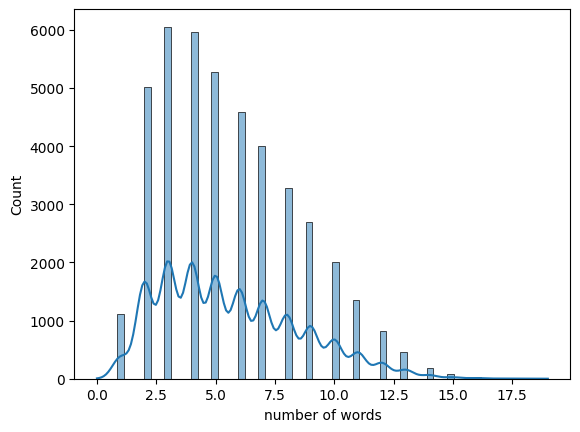

In [50]:
sns.histplot(filtered_tweets_length, kde= True)
plt.xlabel('number of words')
plt.show()

the overall distribution changed a lot from cleaned version of the tweets

### empty tweet

In [51]:
filtered_X= filtered_tweets[filtered_tweets != '']

### Comparison
comparison between cleaned and filtered tweets

In [52]:
pd.concat([cleaned_X, filtered_tweets], axis=1,).head()
# first column is cleaned version
# second one is the filtered version

,tweet,tweet
0,my poor little dumpling in holmdel vids he was...,poor little vids trying hope dont try hard ton...
1,i m off too bed i gotta wake up hella early to...,bed wake early tomorrow morning
2,i havent been able to listen to it yet my spea...,able listen speakers
3,now remembers why solving a relatively big equ...,now solving big equation total pain butt
4,ate too much feel sick,ate feel sick


| stat | cleaned | filtered |
|---|---|---|
|max|40|19|
|min|0|0|
|mean|13|5|
|median|12|5|
|mode|8|3|

we can conclude that most of the words used in the tweets are most common ones or there are some\
writing issues 

In [53]:
# some random examples
# rerun with different random_state entry for other examples
random_cleaned_tweet= cleaned_tweets.sample(1, random_state= 15)
print(f'cleaned tweet:\n{random_cleaned_tweet.iloc[0]}')
print()
print(f'the filtered tweet:\n{filtered_tweets.loc[random_cleaned_tweet.index].iloc[0]}')


cleaned tweet:
now i can never live my dream of looking out that giant window with all the people downstairs outside looking upp

the filtered tweet:
now can live dream looking giant window people looking


### filtered dataset

In [54]:
filtered_y= cleaned_y[filtered_X.index].copy()# to align y values with the remaining tweets
filtered_y.value_counts(normalize=True)

0    0.50484
1    0.49516
Name: Sentiment, dtype: float64

In [55]:
filtered_dataset= pd.concat([filtered_y, filtered_X], axis=1)
filtered_dataset.head()

,Sentiment,tweet
0,0,poor little vids trying hope dont try hard ton...
1,0,bed wake early tomorrow morning
2,0,able listen speakers
3,0,now solving big equation total pain butt
4,0,ate feel sick


In [56]:
filtered_dataset.to_csv('../data/interim/filtered_dataset.csv', index=False)